In [ ]:
import numpy as np
import sympy as sym
import math
import scipy
from scipy import stats
import matplotlib.pyplot as plt
import seaborn

**Задание 1**

Вычислите производную функции:

в точке x0=1

In [ ]:
# Вычислите производную функции: в точке x0=1
x = sym.Symbol('x')
y = sym.tan(sym.sin(x) + sym.cos(2*x+3))**2 # Собственно сама функция
y

tan(sin(x) + cos(2*x + 3))**2

In [ ]:
diff_f = sym.diff(y, x) # Производная функции
diff_f

2*(-2*sin(2*x + 3) + cos(x))*(tan(sin(x) + cos(2*x + 3))**2 + 1)*tan(sin(x) + cos(2*x + 3))

In [ ]:
# Решение задания
def fun_tan(x): # Создаём функцию
  return math.tan(math.sin(x) + math.cos(2*x+3))**2

In [ ]:
x0 = 1 # точка поиска

In [ ]:
scipy.misc.derivative(func=fun_tan, x0=x0, n=1) # В версии SciPy v1.12.0. данный метод будет удалён?

<ipython-input-21-0d61679e2d1d>:1: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  scipy.misc.derivative(func=fun_tan, x0=x0, n=1) # В версии SciPy v1.12.0. данный метод будет удалён?


57.06531269460301

**Задание 2**

При помощи матричных операций выполните:

Масштабирование и смещение объекта (применить 2 матрицы трансформаций). Масштабирование на (0.5, 1.2) и смещение на (200, 300)

(-200.0, 200.0)

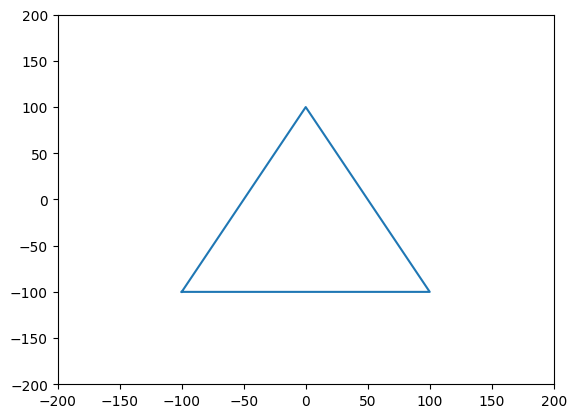

In [ ]:
A = [
[-100, -100, 1],
[0, 100, 1],
[100, -100, 1],
[-100, -100, 1]
]

A = np.array(A)

x = A[:,0]
y = A[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [ ]:
# Матрица маштабирования
mT_1 = np.array([[0.5, 0, 0],[0, 1.2, 0], [0, 0, 1]])
mT_1

array([[0.5, 0. , 0. ],
       [0. , 1.2, 0. ],
       [0. , 0. , 1. ]])

(-200.0, 200.0)

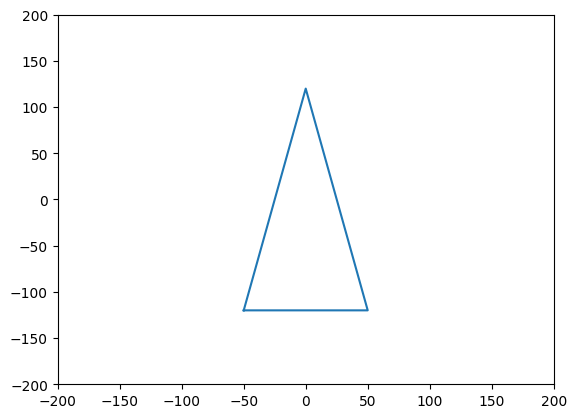

In [ ]:
A_1 = A @ mT_1 # или np.dot(A,  mT_1)

x = A_1[:,0]
y = A_1[:,1]
plt.plot(x, y)
plt.ylim([-200, 200])
plt.xlim([-200, 200])

In [ ]:
# Матрица трансляции(перемещения)
mT_2 = np.array([[1, 0, 0],[0, 1, 0],[200, 300, 1]])
mT_2

array([[  1,   0,   0],
       [  0,   1,   0],
       [200, 300,   1]])

(-450.0, 450.0)

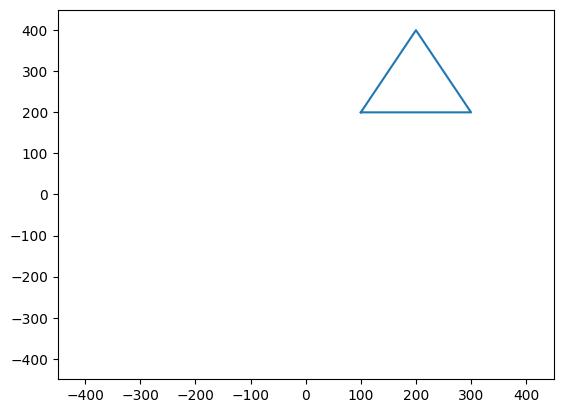

In [ ]:
A_2 = A @ mT_2 # или np.dot(A,  mT_2)

x = A_2[:,0]
y = A_2[:,1]
plt.plot(x, y)
plt.ylim([-450, 450])
plt.xlim([-450, 450])

In [ ]:
# Комбинированная матрица маштабирования и смещения
mT_3 = np.dot(mT_1, mT_2) # или mT_1 @ mT_2
mT_3

array([[  0.5,   0. ,   0. ],
       [  0. ,   1.2,   0. ],
       [200. , 300. ,   1. ]])

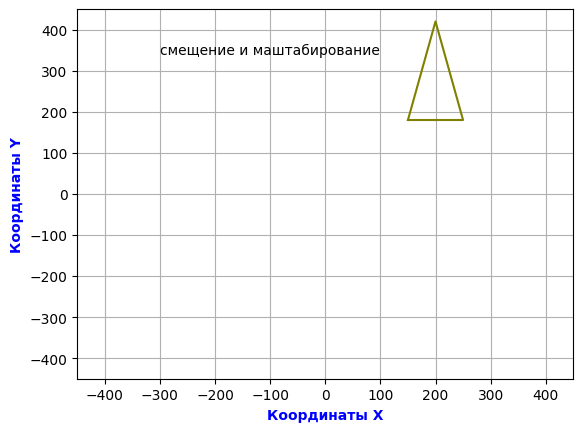

In [ ]:
A_3 = np.dot(A, mT_3)

x = A_3[:,0]
y = A_3[:,1]
plt.plot(x, y, color='olive')
plt.grid()
plt.ylim([-450, 450])
plt.xlim([-450, 450])
plt.xlabel('Координаты Х', fontweight='extra bold', color='b')
plt.ylabel('Координаты Y', fontweight='extra bold', color='b')
plt.text(-300, 340, 'смещение и маштабирование');

**Задание 3**

Найдите собственные значения и собственные вектора матрицы:

In [ ]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [ ]:
res_m =  np.linalg.eig(m)         #scipy.linalg.eig(m)
res_m

EigResult(eigenvalues=array([ 3., -1.]), eigenvectors=array([[ 0.89442719, -0.89442719],
       [ 0.4472136 ,  0.4472136 ]]))

In [ ]:
vec1 = np.transpose(res_m[1])[0]/np.transpose(res_m[1])[0][-1]
vec2 = np.transpose(res_m[1])[1]/np.transpose(res_m[1])[1][-1]

print(f'Cобственные значения матрицы: {res_m[0]}')
print(f'Собственные вектора матрицы:{vec1} и {vec2} ')

Cобственные значения матрицы: [ 3. -1.]
Собственные вектора матрицы:[2. 1.] и [-2.  1.] 


**Задание 4**

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x.

Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку error

In [ ]:
"""scipy.optimize.curve_fit
scipy.optimize.minimize (+ method=’COBYLA’)
scipy.optimize.differential_evolution (+ scipy.optimize.Bounds)
"""

In [ ]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [ ]:
x = sym.Symbol('x')
a = sym.Symbol('a')
b = sym.Symbol('b')

fun_ = sym.exp(a)*sym.sin(b*x)+x
fun_

x + exp(a)*sin(b*x)

In [ ]:
xi = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

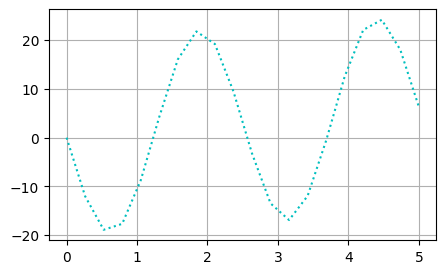

In [ ]:
plt.figure(figsize=(5, 3))
plt.plot(xi, fx, color='c', linestyle='dotted')
plt.grid()
plt.show()


In [ ]:
def error(params):
    return np.sum(np.abs(fx - f(xi, params[0], params[1])))

In [ ]:
res1 = scipy.optimize.minimize(error, [0, 0], method='COBYLA')
res1.x

array([ 3.0000271 , -2.49993557])

In [ ]:
res2 = scipy.optimize.curve_fit(f, xi, fx, p0=[res1.x[0], res1.x[1]])
res2

(array([ 3. , -2.5]),
 array([[ 2.68953126e-18, -5.23196280e-20],
        [-5.23196280e-20,  2.80481722e-19]]))

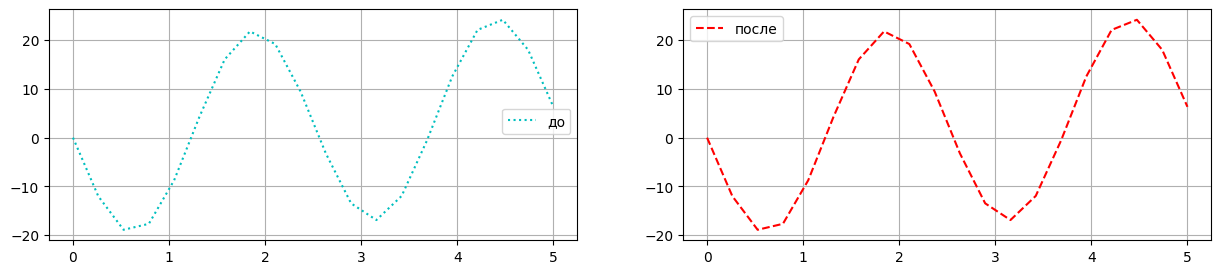

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(15, 3))

axs[0].plot(xi, fx, color='c', linestyle='dotted', label='до')
axs[0].grid()
axs[0].legend()
axs[1].plot(xi, f(xi, res2[0][0], res2[0][1]), color='r', linestyle='--', label='после')
axs[1].grid()
axs[1].legend()

plt.show()

**Задание 5**

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из пользователей (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [ ]:
"""
sklearn.metrics.pairwise_distances
numpy.dot
numpy.linalg.norm
numpy.nonzero
"""

In [ ]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

In [ ]:
def get_cos(a, b):
    len_a = np.linalg.norm(a)
    len_b = np.linalg.norm(b)
    return np.dot(a, b) / (len_a * len_b)

for i in range(len(raitings)):
    target = 0
    for j in range(len(raitings)):
        if i != j:
            cos = get_cos(raitings[i], raitings[j])
            if cos > target:
                target = cos
                user = j
    print(i, user)

0 8
1 4
2 9
3 9
4 8
5 9
6 3
7 5
8 0
9 2
